# **Régression Linéaire Simple Numpy**

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import make_regression

In [81]:
import matplotlib.pyplot as plt

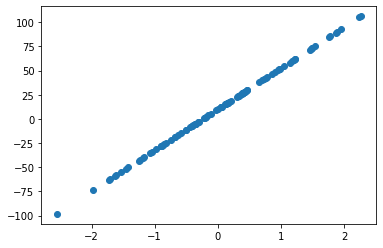

In [82]:
np.random.seed(0)
x,y = make_regression(n_samples=100,n_features=1,bias=10)
plt.scatter(x,y)

In [83]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [84]:
y= y.reshape(y.shape[0],1)
y.shape

(100, 1)

In [85]:
y.shape

(100, 1)

In [86]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


In [87]:
np.random.seed(0)
theta = np.random.randn(2,1)
theta

array([[1.76405235],
       [0.40015721]])

# **modele**




In [88]:
def model(X,theta):
  return X.dot(theta)

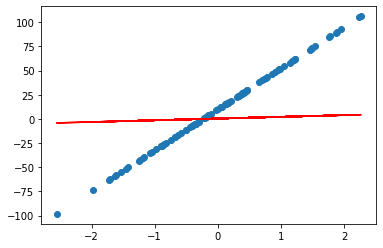

In [90]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

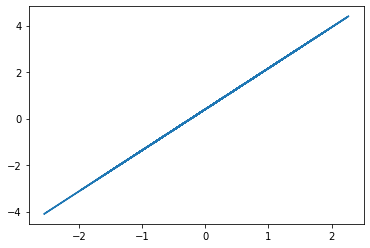

In [92]:
plt.plot(x,model(X,theta))

# **fonction cout**

In [97]:
def cost_function(X, y, theta):
  m=len(y)
  return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [98]:
cost_function(X,y,theta)

910.4613784257111

# **Gradients et desceente de gradient**

In [99]:
def grad(X,y,theta):
  m=len(y)
  return 1/m + X.T.dot(model(X,theta)-y)

In [101]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [103]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [104]:
theta_final

array([[42.3854123 ],
       [ 9.99990554]])

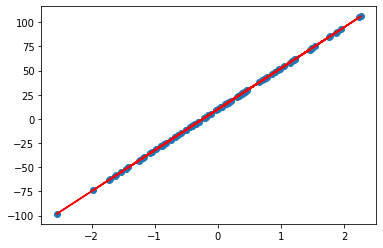

In [105]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')


# **Courbes d'apprentissage**

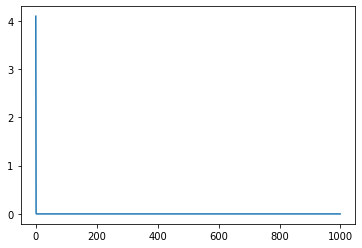

In [106]:
plt.plot(range(n_iterations), cost_history)

# **Evaluation finale**

In [107]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [108]:
coef_determination(y, predictions)

0.9999999999897522